In [25]:
import matplotlib.pyplot as plt
import os
from dataset.ipc2023_learning_domain_info import IPC2023_LEARNING_DOMAINS, DIFFICULTIES, PROBLEM_INDICES
from itertools import product

In [26]:
kwargs = {
    "alpha": 0.5,
    "s": 4,
}

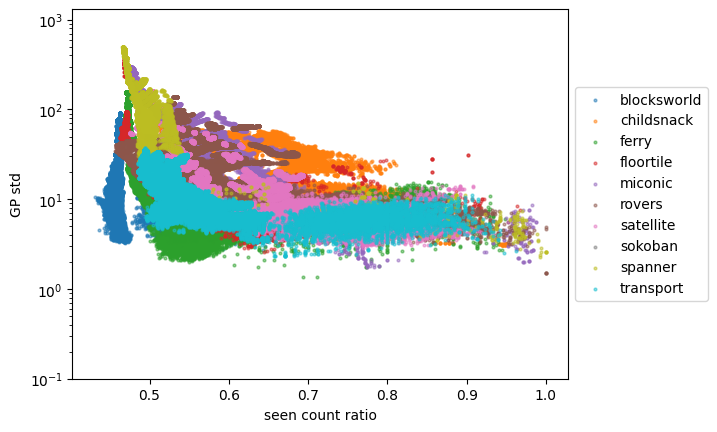

In [27]:
for domain in IPC2023_LEARNING_DOMAINS:
    xs = []
    ys = []
    for difficulty, problem in product(DIFFICULTIES, PROBLEM_INDICES):
        f = f"icaps24_gp_correlation_logs/{domain}_{difficulty}_{problem}_gp.log"
        if not os.path.exists(f):
            continue
        with open(f, "r") as file:
            start = False
            for line in file.readlines():
                if "Number of unseen" in line:
                    start = True
                    continue

                if start:
                    toks = line.split()
                    if len(toks) != 2:
                        break

                    x = float(toks[0])
                    y = float(toks[1])
                    xs.append(x)
                    ys.append(y)
    plt.scatter(xs, ys, label=domain, **kwargs)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylim(0, 10)
plt.xlabel("seen count ratio")
plt.ylabel("GP std")
plt.yscale("log")
plt.ylim(bottom=1e-1)
plt.show()


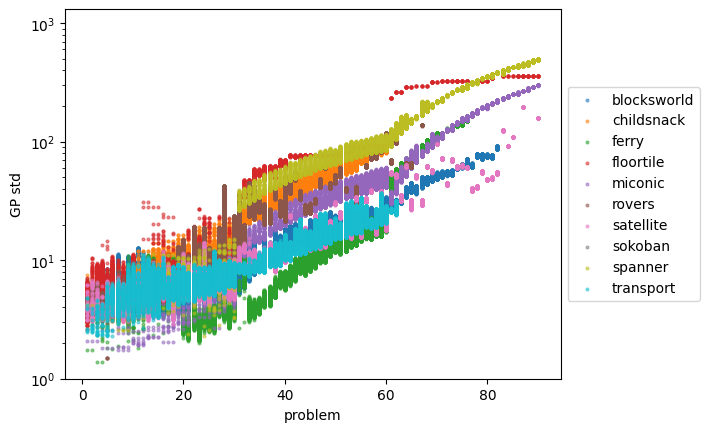

In [30]:
diff_to_int = {
    "easy": 0,
    "medium": 1,
    "hard": 2,
}

for domain in IPC2023_LEARNING_DOMAINS:
    xs = []
    ys = []
    for difficulty, problem in product(DIFFICULTIES, PROBLEM_INDICES):
        f = f"icaps24_gp_correlation_logs/{domain}_{difficulty}_{problem}_gp.log"
        if not os.path.exists(f):
            continue
        with open(f, "r") as file:
            start = False
            for line in file.readlines():
                if "Number of unseen" in line:
                    start = True
                    continue

                if start:
                    toks = line.split()
                    if len(toks) != 2:
                        break

                    x = float(diff_to_int[difficulty] * 30 + int(problem[1:]))
                    y = float(toks[1])
                    xs.append(x)
                    ys.append(y)
    plt.scatter(xs, ys, label=domain, **kwargs)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale("log")
plt.xlabel("problem")
plt.ylabel("GP std")
plt.ylim(bottom=1)
plt.show()


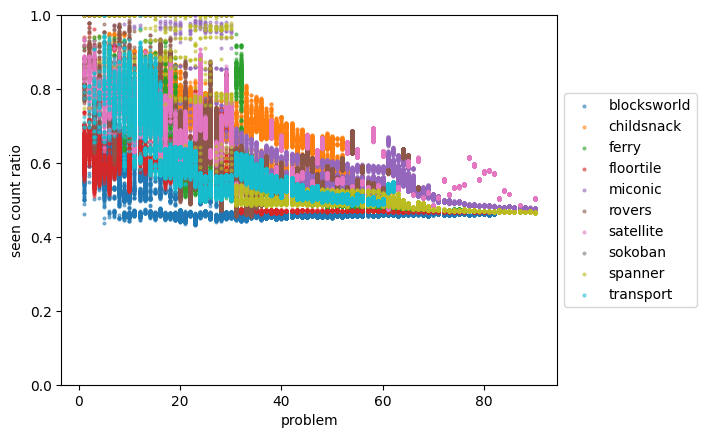

In [34]:
diff_to_int = {
    "easy": 0,
    "medium": 1,
    "hard": 2,
}

for domain in IPC2023_LEARNING_DOMAINS:
    xs = []
    ys = []
    for difficulty, problem in product(DIFFICULTIES, PROBLEM_INDICES):
        f = f"icaps24_gp_correlation_logs/{domain}_{difficulty}_{problem}_gp.log"
        if not os.path.exists(f):
            continue
        with open(f, "r") as file:
            start = False
            for line in file.readlines():
                if "Number of unseen" in line:
                    start = True
                    continue

                if start:
                    toks = line.split()
                    if len(toks) != 2:
                        break

                    x = float(diff_to_int[difficulty] * 30 + int(problem[1:]))
                    y = float(toks[0])
                    xs.append(x)
                    ys.append(y)
    plt.scatter(xs, ys, label=domain, **kwargs)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.yscale("log")
plt.xlabel("problem")
plt.ylabel("seen count ratio")
plt.ylim((0, 1))
plt.show()
